## Introduction

Each year, the NFL hosts a draft which allows each team the opportunity to infuse their rosters with potential, up and coming, new talent, from schools and college campuses all across the nation. While some players will provide an instant boost to the team that drafted them, others will not make the team roster. Over the years, the NFL Draft has gone through many changes. Currently, each of the 32 clubs receives one pick in each of the seven rounds. Draft order is determined by the reverse order of finish in the previous season. For players to be eligible for the draft, they must be out of high school for at least three years and must have used up their college eligibility before the start of the next college football season. (Information acquired from [The Rules of the Draft](https://operations.nfl.com/journey-to-the-nfl/the-nfl-draft/the-rules-of-the-draft/).)

The goal of this project is to analyze [NFL draft data](https://www.kaggle.com/datasets/dubradave/nfl-draft-history-1990-present?resource=download) from 1990-2022. This project will be working with only one data set to provide answers to the questions below, along with others that may arise along the way. 

#### Questions and Goals:

* Create new data frames by separating the drafts by decade.
* Uncover which teams had the most top 10 picks over the years?
* Which positions have been chosen the most with the first 10 picks?
* How many 1st round & non-1st round players, by position, have made it to the HOF?
* Which colleges have had the most 1st round picks?
* Which colleges have the most players from select positions drafted over the years?
* Compare offensive vs. defensive draft statistics.

### Getting Started

First, I will be importing the necessary libraries that will be used throughout this project. 

In [1]:
# Import the necessary libraries for this project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib notebook

### Loading the Data

To better analyze the data, `NFLDraftHistory.csv`, I will be loading it into a data frame called `nfl_all`. Thereafter, I will view the first five rows of data by calling `.head()` on the new data frame. 

In [2]:
# Load the CSV data into the data frame for further analysis, and call the first five rows using '.head()''
nfl_all = pd.read_csv("NFLDraftHistory.csv")

nfl_all.head()

,season,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,pfr_player_name,hof,position,...,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
0,1990,1,1,IND,NaN,GeorJe00,jeff-george-1,Jeff George,False,QB,...,113.0,168.0,307.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1990,1,2,NYJ,NaN,ThomBl00,blair-thomas-1,Blair Thomas,False,RB,...,0.0,533.0,2236.0,7.0,71.0,513.0,2.0,NaN,NaN,NaN
2,1990,1,3,SEA,NaN,KennCo00,NaN,Cortez Kennedy,True,DT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,58.0
3,1990,1,4,TAM,NaN,McCaKe21,keith-mccants-1,Keith McCants,False,DE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,13.5
4,1990,1,5,SDG,NaN,SeauJu00,junior-seau-1,Junior Seau,True,LB,...,0.0,0.0,0.0,0.0,2.0,8.0,0.0,NaN,18.0,56.5


### Exploring the Data

Within `nfl_all`, there are a total of 36 columns. It is apparent right away that some columns will not be needed within this project, but before further analysis, I will gather more information on the data by calling `.info()` to provide specifications on column names, how many rows the data has, data types, and a brief view of whether or not there are null values. 

In [3]:
# Gather more info on the loaded data using '.info()'
nfl_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            8555 non-null   int64  
 1   round             8555 non-null   int64  
 2   pick              8555 non-null   int64  
 3   team              8555 non-null   object 
 4   gsis_id           2243 non-null   object 
 5   pfr_player_id     7761 non-null   object 
 6   cfb_player_id     6223 non-null   object 
 7   pfr_player_name   8555 non-null   object 
 8   hof               8555 non-null   bool   
 9   position          8555 non-null   object 
 10  category          8555 non-null   object 
 11  side              8554 non-null   object 
 12  college           8538 non-null   object 
 13  age               7756 non-null   float64
 14  to                7465 non-null   float64
 15  allpro            8555 non-null   int64  
 16  probowls          8555 non-null   int64  


### Filtering Data

Next, I will be filtering columns to a new data frame called `nfl` to clear unnecessary columns that will not be necessary for evaluation within this project. Further below, I will use `.describe()` to get an better view of the numerical columns in the data set, and also view columns with `null` values. 

In [4]:
# Create a new data frame to remove unnecessary columns
nfl = nfl_all.filter(['season', 'round', 'pick', 'team', 'pfr_player_name', 'hof', 'position', 'college',\
                      'games', 'pass_completions', 'pass_attempts', 'pass_yards', 'pass_tds', 'pass_ints', \
                      'rush_atts', 'rush_yards', 'rush_tds', 'receptions', 'rec_yards', 'rec_tds', 'def_solo_tackles', \
                      'def_ints', 'def_sacks'], axis = 1)

nfl.head()

,season,round,pick,team,pfr_player_name,hof,position,college,games,pass_completions,...,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
0,1990,1,1,IND,Jeff George,False,QB,Illinois,131.0,2298.0,...,113.0,168.0,307.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1990,1,2,NYJ,Blair Thomas,False,RB,Penn St.,64.0,1.0,...,0.0,533.0,2236.0,7.0,71.0,513.0,2.0,NaN,NaN,NaN
2,1990,1,3,SEA,Cortez Kennedy,True,DT,Miami (FL),167.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,58.0
3,1990,1,4,TAM,Keith McCants,False,DE,Alabama,88.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,13.5
4,1990,1,5,SDG,Junior Seau,True,LB,USC,268.0,0.0,...,0.0,0.0,0.0,0.0,2.0,8.0,0.0,NaN,18.0,56.5


In [5]:
# Check for large outliers in numerical data using '.describe()'
nfl.describe()

,season,round,pick,games,pass_completions,pass_attempts,pass_yards,pass_tds,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
count,8555.000000,8555.000000,8555.000000,7465.000000,7465.000000,7465.000000,7465.000000,7465.000000,7464.000000,7465.000000,7465.000000,7465.000000,7465.000000,7465.000000,7465.000000,4527.00000,1784.000000,2356.000000
mean,2005.734191,4.474226,131.334307,64.476758,33.434561,54.994240,383.168788,2.319089,1.538719,47.568386,197.805626,1.411922,33.487609,386.253717,2.326591,104.58140,6.574552,12.368209
std,9.698250,2.350040,77.188144,53.040175,303.791830,486.209344,3503.225220,22.858669,12.867817,236.563697,999.092206,7.393712,108.201927,1359.035777,8.923906,158.68361,8.484491,19.307824
min,1990.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-8.000000,0.000000,0.000000,0.000000,-36.000000,0.000000,0.000000,-16.000000,0.000000,1.00000,1.000000,0.500000
25%,1997.000000,3.000000,65.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.00000,1.000000,2.000000
50%,2006.000000,4.000000,130.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.00000,3.000000,5.000000
75%,2014.000000,6.000000,195.000000,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,16.000000,0.000000,142.00000,8.000000,14.000000
max,2022.000000,12.000000,336.000000,335.000000,7753.000000,12050.000000,89214.000000,649.000000,336.000000,4409.000000,18355.000000,164.000000,1432.000000,17492.000000,156.000000,1568.00000,65.000000,159.500000


In [6]:
# Check columns for null values
nfl.isnull().sum()

season                 0
round                  0
pick                   0
team                   0
pfr_player_name        0
hof                    0
position               0
college               17
games               1090
pass_completions    1090
pass_attempts       1090
pass_yards          1090
pass_tds            1090
pass_ints           1091
rush_atts           1090
rush_yards          1090
rush_tds            1090
receptions          1090
rec_yards           1090
rec_tds             1090
def_solo_tackles    4028
def_ints            6771
def_sacks           6199
dtype: int64

In [7]:
# View the `games` column to better understand why these values are null
nfl[nfl['games'].isna()].tail(10)

,season,round,pick,team,pfr_player_name,hof,position,college,games,pass_completions,...,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
8511,2022,6,219,TEN,Chance Campbell,False,LB,Mississippi,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8512,2022,6,220,SFO,Kalia Davis,False,DT,Central Florida,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8516,2022,7,224,MIA,Cameron Goode,False,OLB,California,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8521,2022,7,229,SEA,Bo Melton,False,WR,Rutgers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8526,2022,7,234,GNB,Jonathan Ford,False,DT,Miami (FL),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8533,2022,7,241,PIT,Chris Oladokun,False,QB,South Dakota St.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8537,2022,7,245,NWE,Andrew Stueber,False,OL,Michigan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8538,2022,7,246,CLE,Dawson Deaton,False,OL,Texas Tech,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8540,2022,7,248,TAM,Andre Anthony,False,DE,LSU,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8549,2022,7,257,ARI,Marquis Hayes,False,OL,Oklahoma,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Null Values

In review of the `games` column, it appears there are a variety of reasons for the 1,000+ `null` values, along with the `null` values on the offensive and defensive stat columns. Either these players were drafted and cut by the team, an injury held them out for the season, or they were drafted as a backup player for their position and didn't see game time. The defensive stat columns only apply to defensive players, not offensive, and the reasons for fluctuation in `null` values for defensive stats also vary. For example, defensive linemen spend most their time rushing the quarterback, and most likely won't have a chance to intercept a pass. On the other hand, defensive backs, safties, and corner backs, for the most part, spend most of their time defending the pass, and not rushing the quarterback. In turn, they won't have a chance to earn a sack of the quarterback. These are just a few examples explaining the `null` values. 


The `games` column will be used for further analysis later in this project, and the `null` values will need to be addressed. I will be replacing all `null` values in the `games` column with the value of `0`. 

In [8]:
# Fill null values in the `games` column
nfl.games = nfl.games.fillna(0)

nfl.games.isnull().sum()

0

In [9]:
# Identify the 17 null values in the `college` column
nfl[nfl['college'].isna()]

,season,round,pick,team,pfr_player_name,hof,position,college,games,pass_completions,...,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
496,1991,6,166,BUF,Millard Hamilton,False,WR,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1412,1994,6,188,BUF,Anthony Abrams,False,DE,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1684,1995,7,238,SFO,Herbert Coleman,False,DE,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1933,1996,7,238,BAL,Jon Stark,False,QB,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2605,1999,6,175,CAR,Robert Daniel,False,DE,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5734,2011,7,245,BUF,Michael Jasper,False,DT,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5828,2012,3,85,DET,Bill Bentley,False,DB,NaN,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,NaN,NaN
5832,2012,3,89,NOR,Akiem Hicks,False,DE,NaN,149.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,263.0,NaN,41.5
5853,2012,4,110,SDG,Ladarius Green,False,TE,NaN,53.0,0.0,...,0.0,0.0,0.0,0.0,95.0,1391.0,8.0,16.0,NaN,NaN
5912,2012,5,169,BAL,Asa Jackson,False,DB,NaN,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,NaN,NaN


After identifying the `null` values in the column `college`, and being this is not a numerical column where we could apply the mean or median to, I will simply replace the null values with an empty string `' '` to keep the data as original as possible and not manipulate or skew it in any way. 

In [10]:
nfl.college = nfl.college.fillna(' ')

nfl.college.isnull().sum()

0

### Further Review of Column Values

Next, I will gather and review and count the unique values of the `team`, `season`, `position`, and `college` columns. 

In [11]:
print(nfl.team.nunique())
print(nfl.team.unique())

38
['IND' 'NYJ' 'SEA' 'TAM' 'SDG' 'CHI' 'DET' 'NWE' 'MIA' 'RAI' 'CIN' 'KAN'
 'NOR' 'HOU' 'BUF' 'DAL' 'GNB' 'ATL' 'PIT' 'PHI' 'RAM' 'NYG' 'SFO' 'PHO'
 'CLE' 'WAS' 'DEN' 'MIN' 'ARI' 'JAX' 'CAR' 'STL' 'OAK' 'BAL' 'TEN' 'LAR'
 'LAC' 'LVR']


Within the NFL, there are now 32 unique teams. From 1990-2022, there have been many changes in team names, cities, and new teams coming into the leage. Below is an explanation of all the [team changes](https://en.wikipedia.org/wiki/Timeline_of_the_National_Football_League) from 1990-2022: 

* 1994 - Phoenix Cardinals became the Arizona Cardinals
* 1995 - Carolina Panthers and Jaxonville Jaguars became enfranchised. LA Raiders moved to Oakland. LA Rams moved to St. Louis. 
* 1996 - Cleveland Browns were deactivated, and the team became the Baltimore Ravens.
* 1997 - Houston Oilers became the Tennessee Oilers.
* 1999 - Cleveland Browns were reinstated. Tennessee Oilers became the Tennessee Titans. 
* 2002 - Houston Texans were enfranchised. 
* 2016 - St. Louis Rams changed cities back to the LA Rams. 
* 2017 - San Deigo Chargers moved to become LA Chargers. 
* 2020 - Oakland Raiders moved to become Las Vegas Raiders. 

To clean up the data, I will be consolidating the 38 `team` values into 32 to match the current 32 teams in the NFL. The following changes will be made:

* `SDG` will become `LAC`
* `RAI` and `OAK` will become `LVR`
* `RAM` and `STL` will become `LAR`
* `PHO` will become `ARI`

In [12]:
# Consolidate the 38 team values into 32
nfl.team = nfl.team.replace({'SDG': 'LAC', 'RAI': 'LVR', 'OAK': 'LVR', 'RAM': 'LAR', 'STL': 'LAR', 'PHO': 'ARI'})

print(nfl.team.unique())
print(nfl.team.nunique())

['IND' 'NYJ' 'SEA' 'TAM' 'LAC' 'CHI' 'DET' 'NWE' 'MIA' 'LVR' 'CIN' 'KAN'
 'NOR' 'HOU' 'BUF' 'DAL' 'GNB' 'ATL' 'PIT' 'PHI' 'LAR' 'NYG' 'SFO' 'ARI'
 'CLE' 'WAS' 'DEN' 'MIN' 'JAX' 'CAR' 'BAL' 'TEN']
32


In [13]:
# Print the count and unique season values
print(nfl.season.unique())
print(nfl.season.nunique())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]
33


In [14]:
# Print the count of, and, unique position values
print(nfl.position.unique())
print(nfl.position.nunique())

['QB' 'RB' 'DT' 'DE' 'LB' 'DB' 'T' 'TE' 'C' 'WR' 'G' 'FB' 'NT' 'P' 'K'
 'KR' 'OL' 'DL' 'OLB' 'CB' 'S' 'ILB' 'LS' 'SAF' 'OT']
25


In review of the unique `position` values used within this data set, there are a few inconsistencies that turned up. The following positions were introduced to the data set from 2011 or later:

* `CB` (corner back-2015)
* `S` (safety-2015)
* `SAF` (safety-2022)
* `OT` (offensive tackle-2022)
* `OL` (offensive line-2011)
* `DL` (defensive line-2011)
* `OLB` (outside line-backer-2015)
* `ILB` (inside line-backer-2015)

To bring consistency to the results that will be conducted, the following positions will be consolidated into one position for the following reasons:

* `CB`, `S`, `SAF` to become `DB`:
    * These three positions are variations of defensive back (`DB`). Prior to their introduction, `DB` was used to cover all positions.


* `OLB`, `ILB` to become `LB`:
    * These two positions are variations of line-backer(`LB`). Prior to their introduction, `LB` was used to cover all positions.


* `DT`, `DE`, `NT` to become `DL`:
    * These three positions are positions across the defensive line (`DL`). Once `DL` was introduced, it was used as a general position for all three. Since changing `DL` into three different positions over 12 years would be too time consuming, `DL` will be kept to consolidate the three into one. 


* `OT`, `T`, `G`, `C` to become `OL`:
    * These four positions are positions across the offensive line (`OL`). Once `OL` was introduced, it was used as a general position for the three prior. `OT` was used only in 2022. Since changing `OL` into four different positions over 12 years would be too time consuming, `OL` will be kept to consolidate the four into one.

In [15]:
nfl.position = nfl.position.replace({'SAF': 'DB', 'CB': 'DB', 'S': 'DB', 'OLB': 'LB', 'ILB': 'LB',\
                                    'DT': 'DL', 'DE': 'DL', 'NT': 'DL',  'OT': 'OL','T': 'OL', 'G': 'OL', 'C': 'OL'})

print(nfl.position.unique())
print(nfl.position.nunique())

['QB' 'RB' 'DL' 'LB' 'DB' 'OL' 'TE' 'WR' 'FB' 'P' 'K' 'KR' 'LS']
13


In [16]:
# Count the unique college values
print(nfl.college.nunique())

373


### Analyze Data

After reviewing a few elements in the data set and taking time to clean columns and fill null values, I will begin my analysis by creating three new data frames in which the `nfl` data frame is broken up by `season` decades. The goal is to check for differences in style of play between the decades. For example, in the 90's many teams focused heavily on running the ball on offense. More recently, many teams have shifted to a pass first type of offense, and not being so run heavy. The `nfl_90s` data frame will span from 1990-1999, `nfl_00s` will span from 2000-2009, and `nfl_10s` will span from 2010-2022 (because there are only three seasons from 2020-2022, these will be gouped within the `nfl_10s` data frame).

In [17]:
# Create the 3 new data frames grouped by decade
nfl_90s = nfl[nfl['season'] <= 1999]
nfl_00s = nfl[(nfl['season'] >= 2000) & (nfl['season'] <= 2009)]
nfl_10s = nfl[nfl['season'] >= 2010]

# Call .info() on one of the data frames to ensure success
nfl_90s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2684 entries, 0 to 2683
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            2684 non-null   int64  
 1   round             2684 non-null   int64  
 2   pick              2684 non-null   int64  
 3   team              2684 non-null   object 
 4   pfr_player_name   2684 non-null   object 
 5   hof               2684 non-null   bool   
 6   position          2684 non-null   object 
 7   college           2684 non-null   object 
 8   games             2684 non-null   float64
 9   pass_completions  2146 non-null   float64
 10  pass_attempts     2146 non-null   float64
 11  pass_yards        2146 non-null   float64
 12  pass_tds          2146 non-null   float64
 13  pass_ints         2146 non-null   float64
 14  rush_atts         2146 non-null   float64
 15  rush_yards        2146 non-null   float64
 16  rush_tds          2146 non-null   float64


#### Most Top 10 Picks

With the three new data frames broken up by decade, along with the `nfl` data frame, I begin by creating a function to determine which teams have had the most first round, top 10 picks within the draft. These would the teams that either performed poorly the season prior, or happened to make a trade and acquire and early round draft pick. 

Since becoming enfranchised in 1995, the Jacksonville Jaguars (`JAX`) have had the most first round, top 10 picks in the last 33 years. Jacksonville remains one of only 4 teams to have never played in a Super Bowl. Could this be evidence of poor judgement in selecting players in the draft that don't live up to their potential? 

While the LA Rams (`LAR`) have had 8 of their 15 top 10 picks come in the 90's (the most in that decade), they have also gone one to win two Super Bowls from 1990-2022. The first one came in 2000, and the other in 2022. 

<IPython.core.display.Javascript object>


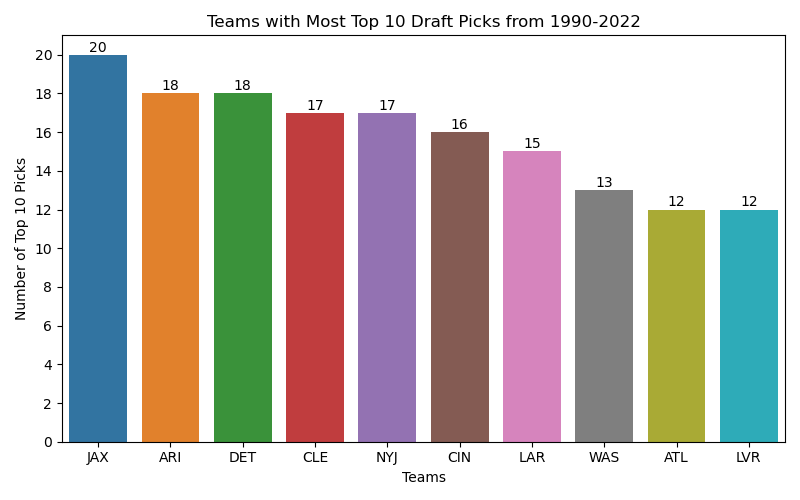

<IPython.core.display.Javascript object>


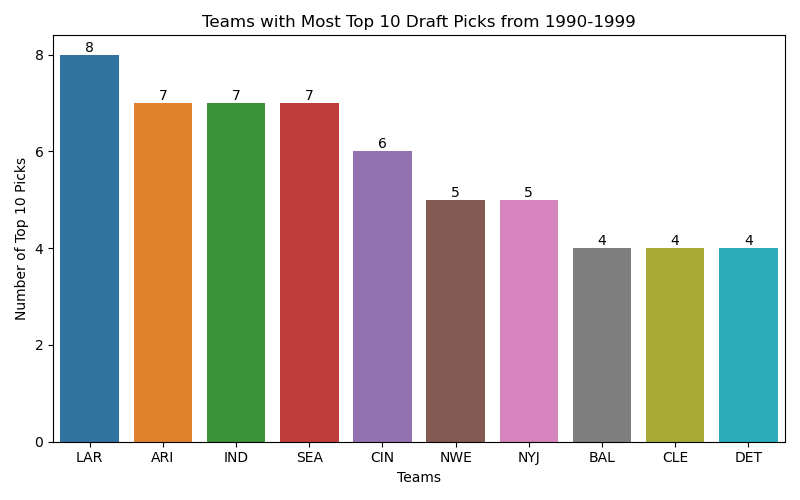

In [18]:
# Create a function to determine which teams have had the most top 10 picks
def team_top10_picks(df):
    # Filter data for round 1 and picks 1-10
    top10 = df[(df['round'] == 1) & (df['pick'] <= 10)]
    # Count number of top 10 picks for each team
    team_top10 = top10.groupby('team')['pfr_player_name'].count()\
            .nlargest(10)\
            .reset_index(name='count')
    # Create a bar plot
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(x='team', y='count', data=team_top10)
    ax.set_yticks(np.arange(0, max(team_top10['count']+2), 2))
    # Add the count of values to the top of the bars in the plot
    ax.bar_label(ax.containers[0])
    # Add axis labels and title
    ax.set(xlabel='Teams', ylabel='Number of Top 10 Picks',
            title=f"Teams with Most Top 10 Draft Picks from {df['season'].min()}-{df['season'].max()}")
    fig.tight_layout();
    
# Call function to display 10 teams with most top 10 draft picks
team_top10_picks(nfl)

# Call function to display 10 teams with most top 10 draft picks in the 90's
team_top10_picks(nfl_90s)

#### Positions Drafted Most in Top 10

This portion of the project is to determing which positions were highest in demand from picks 1-10 of the first round. Generally speaking, teams that draft in the top 10 picks are teams that didn't perform well the season prior. In turn, these draft picks are expected to help address major concerns the team had the season prior. By a fairly wide margin, players across the defensive line (`DL`) were picked most often in both data frames, showing teams more often make repairing the defense a main focus. In the `nfl` data frame, quarterback (`QB`) came in second, followed by offensive line (`OL`). In the `nfl_00s` data frame, wide receivers (`WR`) surprisingly were picked more often than `QB` by a small margin, with `OL` also remaining a big focus coming in third. 

<IPython.core.display.Javascript object>


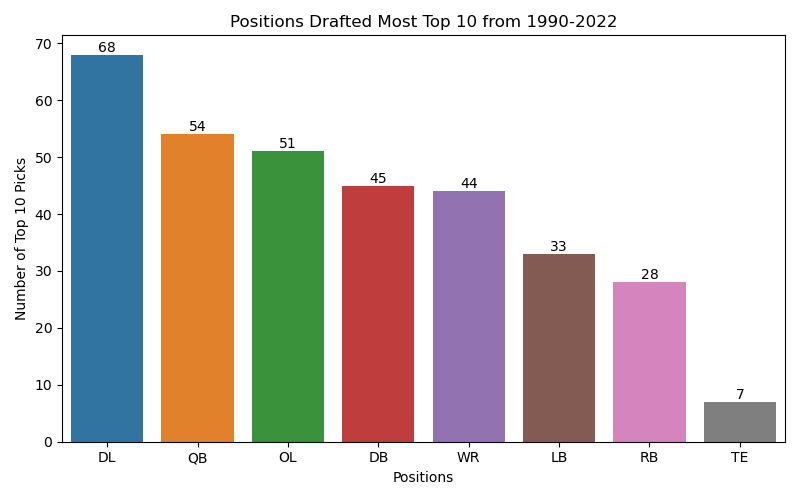

<IPython.core.display.Javascript object>


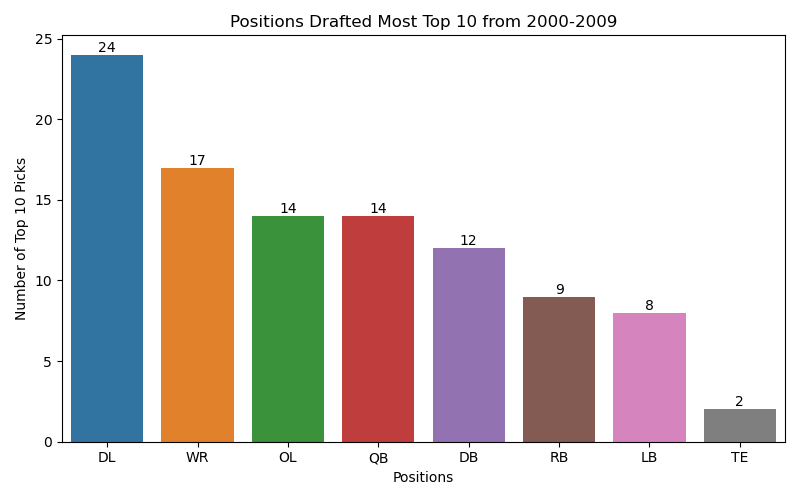

In [19]:
# Create a function to calculate positions drafted most in top 10 picks
def most_top10_picks(df):
    # Filter data for round 1 and picks 1-10
    top10 = df[(df['round'] == 1) & (df['pick'] <= 10)]
    # Count the number of positions drafted in the top 10
    most_draft = top10.groupby('position')['pfr_player_name'].count()\
            .nlargest(10)\
            .reset_index(name = 'count')
    # Create a bar plot
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(x='position', y='count', data=most_draft)
    # Add labels to the top of the bars in the plot
    ax.bar_label(ax.containers[0])
    # Add axis labels and title
    ax.set(xlabel='Positions', ylabel='Number of Top 10 Picks',
            title=f"Positions Drafted Most Top 10 from {df['season'].min()}-{df['season'].max()}")
    fig.tight_layout();

# Call function to display which positions drafted most in top 10 picks
most_top10_picks(nfl)

# Call function to display positions drafted most in top 10 in early 2000's
most_top10_picks(nfl_00s)

#### Position Trends

Next, I would like to take a look at how positional draft trends have changed over time. This will allow us to see which positions tended to be in higher demand during each draft, and possibly help a student athlete determine if they wanted to enter the draft at a specific position. 

The first function call will be comparing offensive stat collecting positions. Throughout each draft, wide receivers (`WR`) were selected most often, with the only exception coming in 2011, when they were overtaken by running backs (`RB`). Both offensive positions remained highest in demand for the most part over the 33 years of data. Surprisingly, quarterbacks (`QB`) were drafted the fewest, being out drafted by tight end (`TE`) most of the years.

The second function call compares the defensive positions, along with the offensive line (`OL`). Defensive backs (`DB`) seem to have the highest demand in the draft, with defensive line (`DL`) and `OL` fluctuating positions below it. Line backers (`LB`) seem to be trailing off in more recent years, though there was an uptick in 2022.

<IPython.core.display.Javascript object>


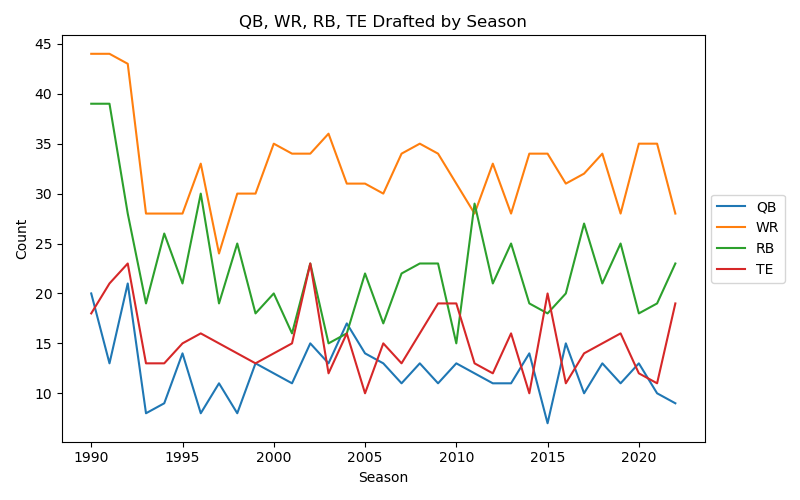

<IPython.core.display.Javascript object>


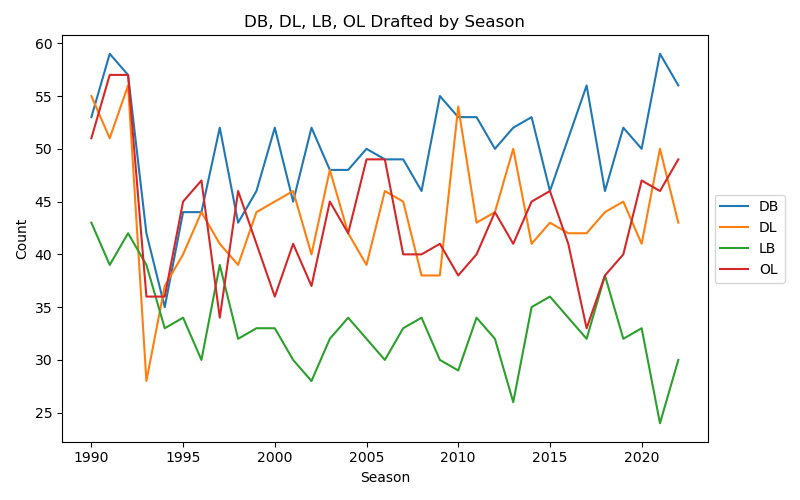

In [20]:
# Create a function to get a count of the specified position drafted
def get_position_counts(df, position):
    # Filter the data for the specified position, grouped by season, count number of occurances by position
    return df[df['position'] == position].groupby('season')['position'].count().reset_index()

# Create a function that takes multiple positions and plots their counts drafted over time
def position_ot(df, *positions):
    fig, ax = plt.subplots(figsize=(8, 5))
    # Loop through each position specified
    for i, pos in enumerate(positions):
        # Get the position counts for the current position
        position = get_position_counts(df, pos)
        # Rename the columns of the position dataframe to 'season' and 'count'
        position.columns = ['season', 'count']
        # Plot a line graph of the position counts
        sns.lineplot(data=position, x='season', y='count', label=pos, ax=ax)
    # Add x and y axis labels and a title to the plot
    ax.set(xlabel='Season', ylabel='Count',
            title=f"{', '.join(positions)} Drafted by Season")
    # Add a legend to the center right, and outside of the plot
    ax.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)
    fig.tight_layout();
    
    
# Plot QB, WR, RB, and TE drafted over time
position_ot(nfl, 'QB', 'WR', 'RB', 'TE')

# Plot DB, DL, LB, and OL drafted over time
position_ot(nfl, 'DB', 'DL', 'LB', 'OL')

#### Hall of Fame

The Hall of Fame (`HOF`) is a prestigious group of NFL personnel, that have made significant contributions to the game of football. As a player, it would mean one had a remarkable career and major impact on the field. The goal is to determine how many players were drafted in, and after, the first round, and made the `HOF`. The function filters the data by position and returns a data frame with the resluts. Within this data set, there are 50 players that have made the `HOF`, five of which played wide receiver (`WR`). Three were drafted in the first round, while two were drafted in later rounds. 

In [21]:
def count_hof(df, pos):
    # Filter data for players that made the HOF and their position
    hof_pos = df[(df['hof'] == True) & (df['position'] == pos)]
    # Count the number of first round and non-first round picks that made the HOF
    count_1st_hof = (hof_pos['round'] == 1).sum()
    count_other_hof = (hof_pos['round'] != 1).sum()
    # Print the results of the count
    print(f"{count_1st_hof} first round {pos}(s) have made the HOF from {df['season'].min()}-{df['season'].max()}.")
    print(f"{count_other_hof} non-first round {pos}(s) have made the HOF from {df['season'].min()}-{df['season'].max()}.")
    # Return the filtered data by position
    return hof_pos
    
# Call function to display position results for RB
count_hof(nfl, 'WR')

3 first round WR(s) have made the HOF from 1990-2022.
2 non-first round WR(s) have made the HOF from 1990-2022.


,season,round,pick,team,pfr_player_name,hof,position,college,games,pass_completions,...,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
1257,1994,2,33,LAR,Isaac Bruce,True,WR,Memphis,223.0,3.0,...,1.0,25.0,139.0,0.0,1024.0,15208.0,91.0,NaN,NaN,NaN
1714,1996,1,19,IND,Marvin Harrison,True,WR,Syracuse,190.0,0.0,...,0.0,10.0,28.0,0.0,1102.0,14580.0,128.0,NaN,NaN,NaN
1784,1996,3,89,SFO,Terrell Owens,True,WR,Chattanooga,219.0,0.0,...,0.0,39.0,251.0,3.0,1078.0,15934.0,153.0,NaN,NaN,NaN
2210,1998,1,21,MIN,Randy Moss,True,WR,Marshall,218.0,4.0,...,1.0,25.0,159.0,0.0,982.0,15292.0,156.0,NaN,1.0,NaN
4473,2007,1,2,DET,Calvin Johnson,True,WR,Georgia Tech,135.0,0.0,...,0.0,19.0,167.0,1.0,731.0,11619.0,83.0,NaN,NaN,NaN


It appears, of the 32 teams, five of them have zero players that have made the `HOF` within this data set; they are the Cincinnati  Bengals (`CIN`), Houston Texans/Houston Oilers (`HOU`), Buffalo Bills (`BUF`), Carolina Panthers (`CAR`), and the Tennessee Titans/Tennessee Oilers (`TEN`). 

In [22]:
# Create a function to uncover which teams drafted zero players that have made it to the HOF in the data frame
def team_hof_players(df):
    # Filter the data for unique teams that have at least one player in the HOF
    team_hof = df[df['hof'] == True]['team'].unique()
    # Gather all the unique team names in the data frame
    all_teams = df['team'].unique()
    # Use a list comprehension to iterate over all teams and check if they are not in 'team_hof'
    no_hof = [team for team in all_teams if team not in team_hof]
    # Return a list of teams that have no players in the HOF in the data frame
    return no_hof

team_hof_players(nfl)

['CIN', 'HOU', 'BUF', 'CAR', 'TEN']

#### College Counts

Of the 373 unique `college` values listed within this data set, the next goal is to find out which 15 colleges have had the most players drafted in the first round of the NFL draft. This could help determine which college football programs are best suited to help their student athletes prepare for success in getting to the NFL. 

Over the 33 years within this data set, `Ohio St.` Buckeyes and `Alabama` Crimson Tide, rank numbers one and two in most players selected in the first round. What's more shocking is that when the data is filtered down even further (from 2010-2022), it become appearant that of the 50 total first round picks selected from `Alabama`, 40 have come within the last 13 years. This tends to coincide with the arrival of their current head coach, Nick Saban. Saban joined the Crimson Tide in 2007, and since then, `Alabama` has won six of their seven national championships with him as their head coach (2009, 2011, 2012, 2015, 2017, 2020). `Ohio St.` seems to provide more consistency in getting their student athletes ready for the NFL with only 21 of their 52 players selected in the first round over the last 13 years. 

<IPython.core.display.Javascript object>


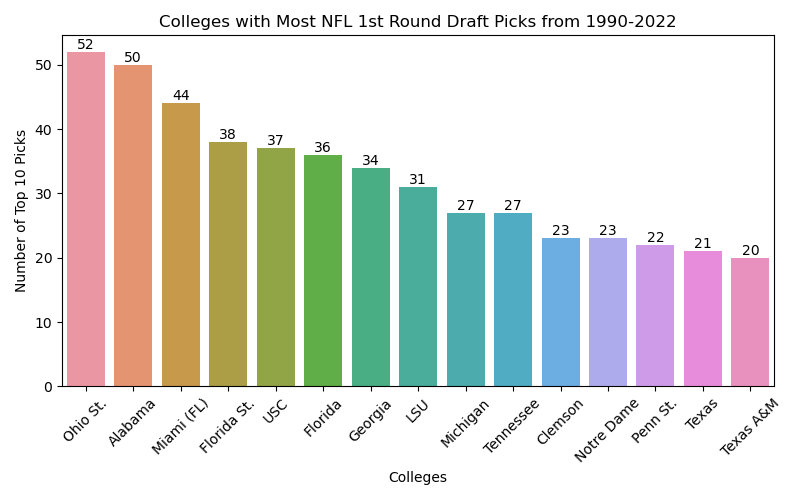

<IPython.core.display.Javascript object>


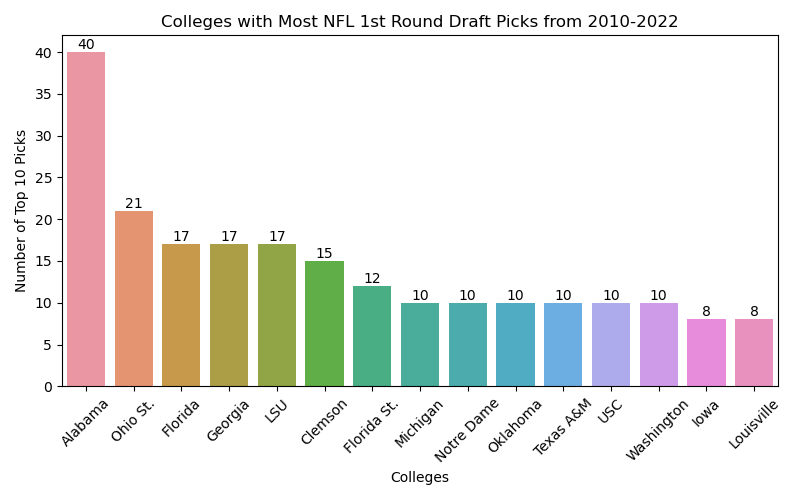

In [23]:
# Create a function to select the 15 colleges with most first round picks
def college_top10(df):
    # Filter data and count first round picks
    college_counts = df[df['round'] == 1]
    # Count the number of players and group by college, then select top 15 colleges
    top_colleges = college_counts.groupby('college')['pfr_player_name'].count()\
            .nlargest(15)\
            .reset_index(name='count')
    # Create a bar plot
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(x='college', y='count', data=top_colleges)
    ax.tick_params(axis='x', labelrotation=45)
    # Add labels to the top of the bars in the plot
    ax.bar_label(ax.containers[0])
    # Add axis labels and title
    ax.set(xlabel='Colleges', ylabel='Number of Top 10 Picks',
            title=f"Colleges with Most NFL 1st Round Draft Picks from {df['season'].min()}-{df['season'].max()}")
    fig.tight_layout();

# Call funtion for colleges with most first round picks
college_top10(nfl)

# Call function for colleges with most first round picks from 2010-current
college_top10(nfl_10s)

To filter the college data even further, I wanted to find out which colleges seemed better prepared at getting players of specific positions drafted in the early round of the NFL draft. Players drafted in the early rounds tend to receive more opportunities from the teams that drafted them, because higher draft capital was spent on those players, and their is more belief in the talent they can bring to the team. 

For running backs (`RB`), `Alabama` came in as the top school to have a `RB` drafted within the first three rounds of the draft. As of the start of the 2022 season, there were [six running backs](https://profootballtalk.nbcsports.com/2022/09/15/alabama-had-58-players-on-nfl-rosters-in-week-1/) that played for `Alabama` currently on an active NFL roster, which was more than any other college. As for wide receivers (`WR`), `Ohio St.` came in as the top school to have a `WR` drafted within the first three rounds. At the beginning of the 2022 season, [ten wide receivers](https://www.foxsports.com/stories/college-football/is-ohio-state-college-footballs-new-wide-receiver-u) from `Ohio St.` were on active NFL rosters, with 2 of them coming in the first 11 picks of the 2022 NFL draft. 

<IPython.core.display.Javascript object>


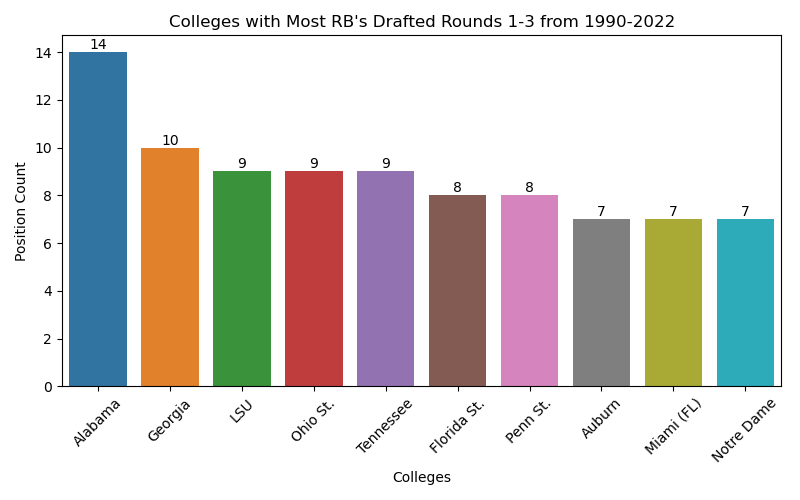

<IPython.core.display.Javascript object>


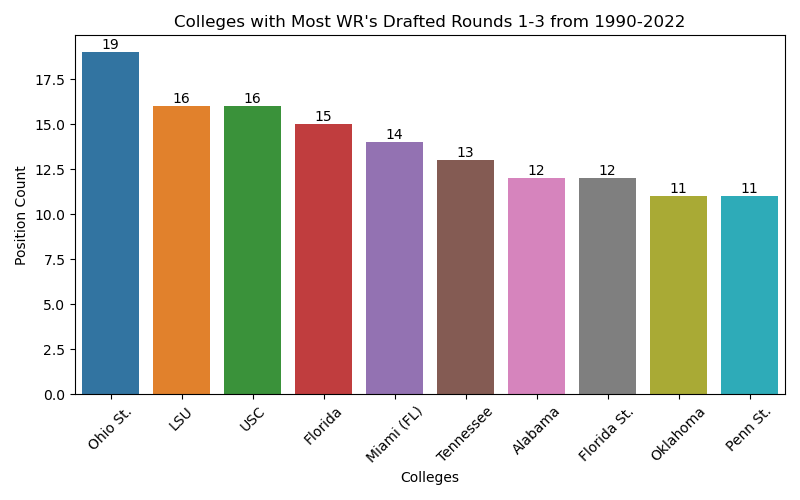

In [24]:
def college_pos(df, pos):
    # Filter data for colleges with the most players drafted in rounds 1-3 and their given position
    college_pos = df[(df['round'] <= 3) & (df['position'] == pos)]\
            .groupby('college')['pfr_player_name'].count()\
            .nlargest(10)\
            .reset_index(name='pos_count')
    # Create a bar plot
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.barplot(x='college', y='pos_count', data=college_pos)
    ax.tick_params(axis='x', labelrotation=45)
    # Add labels to the top of the bars in the plot
    ax.bar_label(ax.containers[0])
    # Add axis labels and title
    ax.set(xlabel='Colleges', ylabel='Position Count',
            title=f"Colleges with Most {pos}'s Drafted Rounds 1-3 from {df['season'].min()}-{df['season'].max()}")
    fig.tight_layout();

# Call function for colleges with most RB's drafted in first 3 rounds    
college_pos(nfl, 'RB')

# Call function for colleges with most WR's drafted in first 3 rounds    
college_pos(nfl, 'WR')

#### Offense vs. Defense Draft Stats

In this portion of the project, I will analyze `offensive` vs. `defensive` positions in the draft to view how draft trends have shifted over time. First, I will create lists that hold `offensive`, `defensive`, and `special_teams` positions to enable distinguishability. These lists will be used to create data frames of `offensive`, `defensive`, and `special_teams` players. 

In [25]:
# Create lists of offensive, defensive, and special teams positions
off_pos = ['QB', 'RB', 'TE','WR', 'FB','OL']
def_pos = ['LB', 'DB', 'DL']
spec_teams = ['P', 'K', 'KR', 'LS']

# Create data frames of offensive, defensive, and special teams players to be used globally
offensive = nfl[nfl['position'].isin(off_pos)]
defensive = nfl[nfl['position'].isin(def_pos)]
special_teams = nfl[nfl['position'].isin(spec_teams)]

Over the course of the 33 years within this data set, the draft trends have shifted quite a bit. From 1990-2009, for the most part, it appears teams focused more on drafting `offensive` players over `defensive` players. Then, from 2009-2022, teams shifted their focus on drafting more `defensive` players versus `offensive` players. In the more recent years in the NFL, teams have shifted their `offensive` scheme away from running the ball first, to a more pass first type of offense, resulting in more explosive and faster scoring plays. Could the recent shift by teams drafting more `defensive` players be appointed to countering these high flying offenses? 

<IPython.core.display.Javascript object>


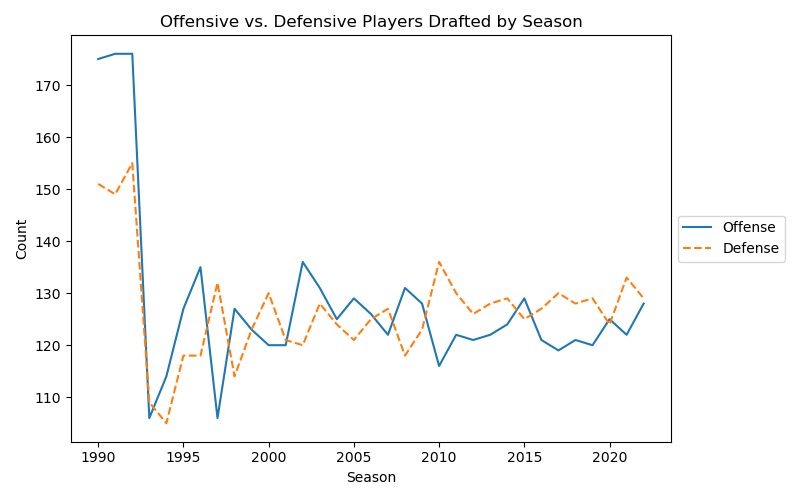

In [26]:
# Create a function to compare offensive vs. defensive draft stats
def off_def_draft(df):
    # Select the offensive and defensive players and filter by season
    offense = offensive.groupby('season')['pfr_player_name'].count()\
            .reset_index(name='count')
    defense = defensive.groupby('season')['pfr_player_name'].count()\
            .reset_index(name='count')
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.lineplot(data=offense, x='season', y='count', label='Offense', ax=ax)
    sns.lineplot(data=defense, x='season', y='count', label='Defense', linestyle='dashed', ax=ax)
    # Add x and y axis labels and a title to the plot
    ax.set(xlabel='Season', ylabel='Count',
           title='Offensive vs. Defensive Players Drafted by Season')
    # Add a legend to the center right, and outside of the plot
    ax.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)
    fig.tight_layout();
    
    
# Call function to compare draft stats    
off_def_draft(nfl)

#### Draft Misses

Being drafted by an NFL `team` is the first step in getting to play in the NFL. The sad reality is that being drafted by a `team` doesn't guarantee a career in the NFL. Once a player is drafted, they will then need to compete to earn a spot on an NFL roster throughout spring training. Many players unfortunately will be cut from teams during this process, while others will be cut, and then picked up by another team. Over the last 33 years, `12.8%` of all players drafted did not get to play in the NFL. Further more, `15.1%` of all `offensive` players drafted did not get to play in the NFL, while only `10.3%` of all `defensive` players drafted did not get to play. This is evidence that shows `defensive` players drafted have a higher probability of seeing the field and getting playing time during an NFL game sometime throughout their career. 

In [27]:
# Create a function to determine what percent of players get drafted and don't ever see playing time
def zero_play_time(df):
    # Filter the data gathering players that played 0 games in the NFL
    zero_play = df[df['games'] == 0]['pfr_player_name'].count()
    # Calculate percentage of players with no playing time
    perc = round((zero_play / len(df['pfr_player_name']) * 100), 1)
    # Create a variable 'name' to hold the string name referring to the data frame
    name = [x for x in globals() if globals()[x] is df][0]
    # Print results
    return f"{perc}% of all {name} players drafted from {df['season'].min()}-{df['season'].max()} did not see any playing time."


# Display results of the NFL data frame
print(zero_play_time(nfl), '\n')

# Display results of the offensive players data frame
print(zero_play_time(offensive), '\n')

# Display results of the defensive players data frame
print(zero_play_time(defensive), '\n')

12.8% of all nfl players drafted from 1990-2022 did not see any playing time. 

15.1% of all offensive players drafted from 1990-2022 did not see any playing time. 

10.3% of all defensive players drafted from 1990-2022 did not see any playing time. 



## Conclusion

Through the analysis of this project, many observations were able to be made, along with many visuals, and unique findings. The goal of the project was to also provide answers to the following questions:

* Uncover which teams had the most top 10 picks over the years?
    * The teams with the most top 10 picks within this data set were the Jacksonville Jaguars (`JAX`), Arizona Cardinals (`ARI`), Detroit Lions (`DET`), Cleveland Browns (`CLE`), and the New York Jets (`NYJ`)
    

* Which positions have been chosen the most with the first 10 picks?
    * The top four positions drafted most often with the first 10 picks were players along the defensive line (`DL`), quarterbacks (`QB`), players along the offensive line (`OL`), and defensive backs (`DB`). `DB` tended to be the most drafted position in each draft over the years, with `DL`, `OL`, and wide receiver (`WR`) also seeing high draft numbers.  


* How many 1st round & non-1st round players, by position, have made it to the HOF?
    * Of the position observed, `WR`, there were a total of five players that made it to the Hall of Fame (`HOF`). Three players were drafted in the first round, and two were drafted between rounds two and three. 
    
    

* Which colleges have had the most 1st round picks?
    * `Ohio St.`, `Alabama`, and `Miami (FL)` came in first to third, respectively, in having the most amount of their student athletes drafted in the first round. Given the more recent success of `Alabama`, it was quite surprising to find out that 40 of their 50 first round draft picks within this data set had come within the last 13 years. 
    
    

* Which colleges have the most players from select positions drafted round 1-3 over the years?
    * `Alabama` has been able to produce the highest number of running backs (`RB`) drafted within the first three rounds of this data set. At the start of the 2022 NFL season, there were six `RB`'s on active NFL rosters that also played for `Alabama`. For `WR`, `Ohio St.` had produced the highest number drafted within the first three rounds of this data set. Similarly, ten `WR` from `Ohio St.` were on active NFL rosters at the start of the 2022 season. 


* Compare offensive vs. defensive draft statistics.
    * In the early portion of the data set, `offensive` players seemed to have higher draft numbers when compared to `defensive` players. Then, things shifted as of 2010, where `defensive` players tended to have higher draft numbers than `offensive` players. Moreover, 15.1% of all `offensive` players drafted did not see any playing time in the NFL, compared to only 10.3% of all `defensive` players drafed. 